In [1215]:
import numpy as np
import matplotlib.pyplot as plt

In [1216]:
class ellipse:
    def __init__(self, major_axis, minor_axis, ellipse_x, ellipse_y, mean):
        self.major_axis = major_axis
        self.minor_axis = minor_axis
        self.ellipse_x = ellipse_x
        self.ellipse_y = ellipse_y
        self.mean = mean


In [1217]:
def draw_ellipse(x, y):
    data = np.array((x,
                     y))  # 2차원 데이터, 100개의 포인트

    # 데이터 포인트의 평균 계산
    mean = np.mean(data, axis=1)

    # 공분산 행렬 계산
    cov_matrix = np.cov(data)

    # 타원의 매개변수 결정
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    major_axis = 0.7 * np.sqrt(5.991 * eigenvalues[0]) * eigenvectors[:, 0]
    minor_axis = 0.7 * np.sqrt(5.991 * eigenvalues[1]) * eigenvectors[:, 1]

    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_x = mean[0] + major_axis[0] * np.cos(theta) + minor_axis[0] * np.sin(theta)
    ellipse_y = mean[1] + major_axis[1] * np.cos(theta) + minor_axis[1] * np.sin(theta)

    plt.scatter(data[0], data[1], alpha=0.5)
    plt.plot(ellipse_x, ellipse_y, color='red')
    return major_axis, minor_axis, ellipse_x, ellipse_y, mean

init var setting

In [1218]:
class trainPeople:
    def __init__(self, income, outcome, total_price, installment):
        self.income = np.random.normal(income[0], income[1], 1)[0]
        self.outcome = np.random.normal(outcome[0], outcome[1], 1)[0]
        self.total_price = np.random.normal(total_price[0], total_price[1], 1)[0]
        self.installment = np.random.normal(installment[0], installment[1], 1)[0]

In [1219]:
#mean, sigma, size
low_income = [200, 15]
mid_income = [300, 15]
high_income = [400, 15]

incomes = [low_income, mid_income, high_income]

In [1220]:
low_outcome = [100, 20]
mid_outcome = [200, 20]
high_outcome = [300, 20]

outcomes = [low_outcome, mid_outcome, high_outcome]

In [1221]:
# total_price, amount of installment
low_total_price = [70, 20]
mid_total_price = [200, 50]
high_total_price = [500, 150]

total_prices = [low_total_price, mid_total_price, high_total_price]

low_installment = [5, 2]
mid_installment = [30, 10]
high_installment = [100, 40]

installments = [low_installment, mid_installment, high_installment]

In [1222]:
sizeLL = 500
sizeLM = 500
sizeLH = 500

sizeLs = np.array([sizeLL, sizeLM, sizeLH])

sizeML = 500
sizeMM = 500
sizeMH = 500

sizeMs = np.array([sizeML, sizeMM, sizeMH])

sizeHL = 500
sizeHM = 500
sizeHH = 500

sizeHs = np.array([sizeHL, sizeHM, sizeHH])

sizess = np.array([sizeLs, sizeMs, sizeHs])
sizess = sizess.T

In [1224]:
peoples = list()
for i in range(3):
    peoples.append(list())
    for j in range(3):
        peoples[i].append(list())
        for k in range(sizess[i][j]):
            peoples[i][j].append(trainPeople(incomes[i], outcomes[j], total_prices[j], installments[i]))

init var setting

In [1229]:
income_list = list()
for i in range(len(sizess)):
    for j in range(len(sizess[i])):
        for k in range(sizess[i][j]):
            income_list.append(peoples[i][j][k].income)

In [1230]:
outcome_list = list()
for i in range(len(sizess)):
    for j in range(len(sizess[i])):
        for k in range(sizess[i][j]):
            outcome_list.append(peoples[i][j][k].outcome)

In [1231]:
total_price_list = list()
for i in range(len(sizess)):
    for j in range(len(sizess[i])):
        for k in range(sizess[i][j]):
            total_price_list.append(peoples[i][j][k].total_price)

In [1232]:
installment_list = list()
for i in range(len(sizess)):
    for j in range(len(sizess[i])):
        for k in range(sizess[i][j]):
            installment_list.append(peoples[i][j][k].installment)

Text(0.5, 1.0, 'income - outcome distribution')

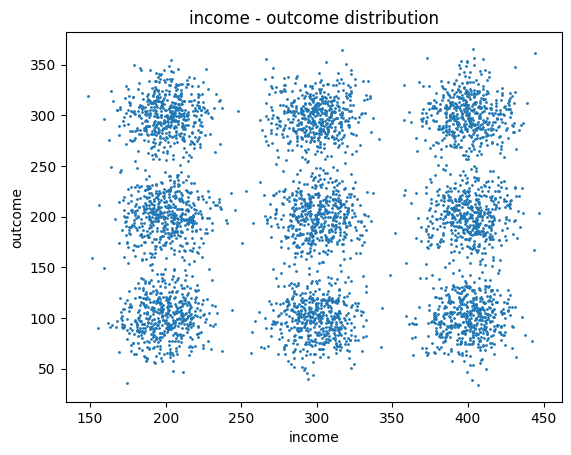

In [1234]:
plt.scatter(income_list, outcome_list, s=1)
plt.xlabel("income")
plt.ylabel("outcome")
plt.title("income - outcome distribution")

Text(0.5, 1.0, 'moim distribution by total price and installment')

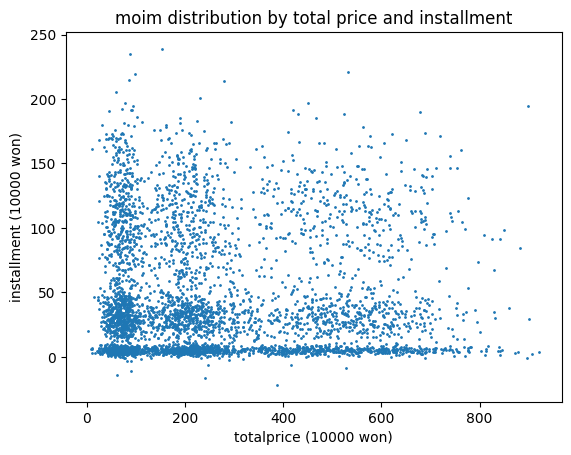

In [1236]:
plt.scatter(total_price_list, installment_list, s=1)
plt.xlabel("totalprice (10000 won)")
plt.ylabel("installment (10000 won)")
plt.title("moim distribution by total price and installment")

In [1237]:
from sklearn.cluster import MeanShift
import sklearn.cluster as cluster

In [1238]:
income_array = np.array(income_list)
outcome_array = np.array(outcome_list)

In [1239]:
trainData = np.array([income_array, outcome_array]).T

In [1240]:
bandwidth = cluster.estimate_bandwidth(trainData, quantile=0.1)

In [1261]:
meanshift = MeanShift(bandwidth=bandwidth)

In [1262]:
ms = meanshift.fit(trainData)

Text(0.5, 1.0, 'people clustered by income, outcome')

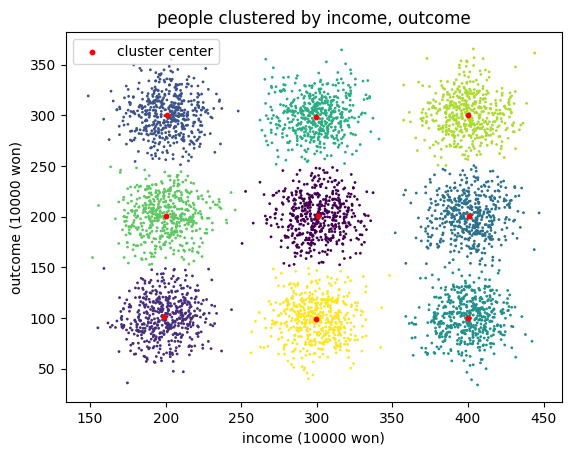

In [1263]:
plt.scatter(income_list, outcome_list, s=1, c=ms.labels_)
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], s=10, c='r', label="cluster center")
plt.legend()
plt.xlabel("income (10000 won)")
plt.ylabel("outcome (10000 won)")
plt.title("people clustered by income, outcome")

Text(0.5, 1.0, 'moim clustered by income, outcome')

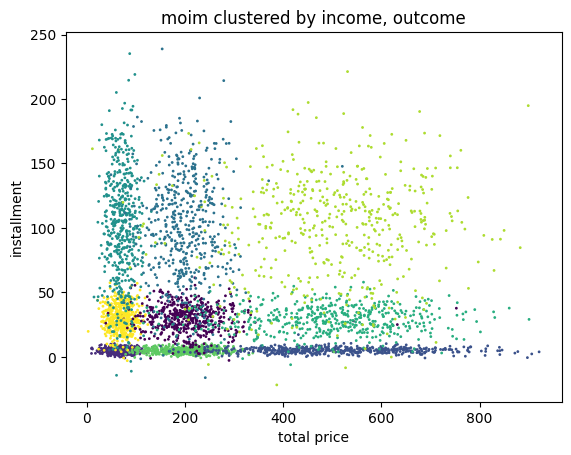

In [1246]:
plt.scatter(total_price_list, installment_list, c=ms.labels_, s=1)
plt.xlabel("total price")
plt.ylabel("installment")
plt.title("moim clustered by income, outcome")

In [1247]:
new_income = 300
new_outcome = 300
new_data = np.array([[new_income, new_outcome]])

In [1248]:
new_labels = ms.predict(new_data)

In [1249]:
new_labels

array([5])

In [1250]:
new_label = new_labels[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


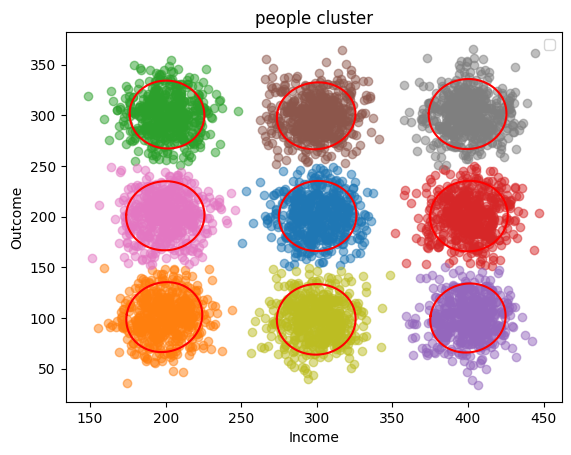

In [1255]:
# 클러스터 중심점 시각화
cluster_centers = ms.cluster_centers_
# 각 클러스터의 데이터를 시각화
for i in range(len(cluster_centers)):
    # 클러스터 레이블이 i인 데이터를 추출하여 시각화
    draw_ellipse([x for x, label in zip(income_list, ms.labels_) if label == i],
                 [x for x, label in zip(outcome_list, ms.labels_) if label == i])

# 새로운 데이터 포인트 시각화
plt.xlabel("Income")
plt.ylabel("Outcome")
plt.title("people cluster")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

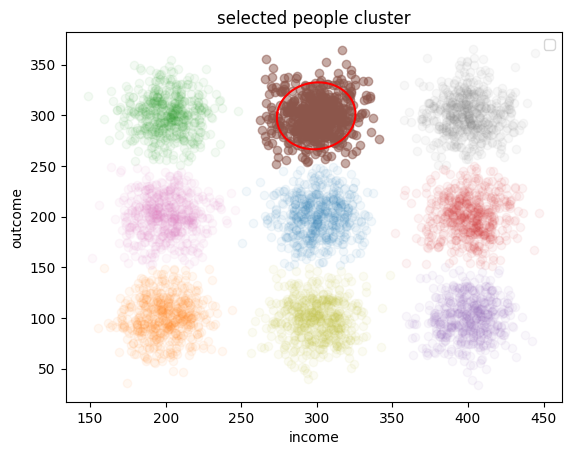

In [1260]:
for i in range(len(cluster_centers)):
    if (i == new_label):
        # 새로운 데이터 포인트 시각화
        draw_ellipse([x for x, label in zip(income_list, ms.labels_) if label == i],
                     [x for x, label in zip(outcome_list, ms.labels_) if label == i],)
    else:
        # 클러스터 레이블이 i인 데이터를 추출하여 시각화
        plt.scatter([x for x, label in zip(income_list, ms.labels_) if label == i],
                    [x for x, label in zip(outcome_list, ms.labels_) if label == i], alpha=0.05)

plt.title("selected people cluster")
plt.xlabel("income")
plt.ylabel("outcome")
plt.legend()
plt.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


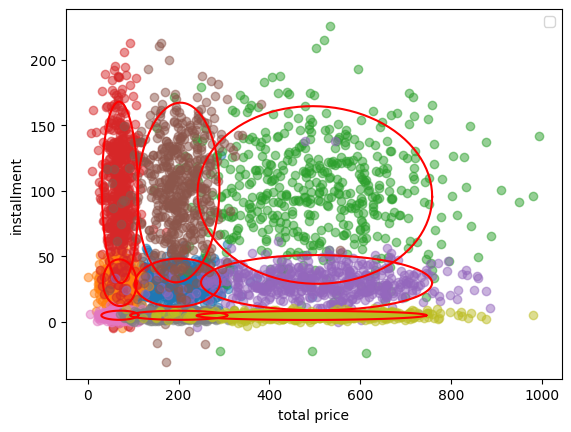

In [1211]:
cluster_centers = ms.cluster_centers_

# 각 클러스터의 데이터를 시각화
for i in range(len(cluster_centers)):
    # 클러스터 레이블이 i인 데이터를 추출하여 시각화
    draw_ellipse([x for x, label in zip(total_price_list, ms.labels_) if label == i],
                 [x for x, label in zip(installment_list, ms.labels_) if label == i])

# 새로운 데이터 포인트 시각화
plt.xlabel("total price")
plt.ylabel("installment")
plt.legend()
plt.show()

Text(0, 0.5, 'installment')

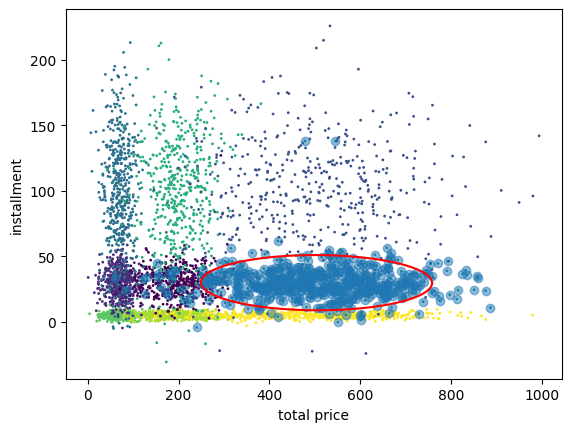

In [1212]:
plt.scatter(total_price_list, installment_list, c=ms.labels_, s=1)
major_axis, minor_axis, ellipse_x, ellipse_y = draw_ellipse(
    [x for x, label in zip(total_price_list, ms.labels_) if label == new_label],
    [x for x, label in zip(installment_list, ms.labels_) if label == new_label])
plt.xlabel("total price")
plt.ylabel("installment")

In [1213]:
import pickle
import joblib

with open('saved_mean_shift_model', 'wb') as f:
    pickle.dump(ms, f)

In [1128]:
with open('saved_mean_shift_model', 'rb') as f:
    model = pickle.load(f)

In [1130]:
model.labels_

array([1, 1, 1, ..., 6, 6, 6])